importlibは一度読み込んだモジュールを再度読み込ませてくれます。

In [1]:
import importlib

なぜこれが嬉しいのかというと、generate.py内の`MatchData`クラスになんらか変更を加えたときに本来であればカーネルをリスタートしてから再度

`import generate as g`

を実行する必要があります。

importlibを使うと下記のように使うことで、カーネルをリスタートせずにgenerateが読み込めるのでかなり楽です。

In [2]:
import generate as g
importlib.reload(g);

match_data = g.MatchData('17sec_vsChuo')

なので、

1. generate.pyを編集する
2. importlib.reload(g)・・上記のセルを実行する
3. jupyter notebook内でMatchDataに加えた変更が試せる

という開発のフローができます。

ただ、3人で同じノートブックを作ると気を使わないといけないところもでてくるので、このノートのコピーを取って自分の名前をつけましょう。

以下、スコットが開発してますので触らないでください

<hr>

In [3]:
import importlib
import generate as g
importlib.reload(g);

match_data = g.MatchData('17sec_vsChuo')

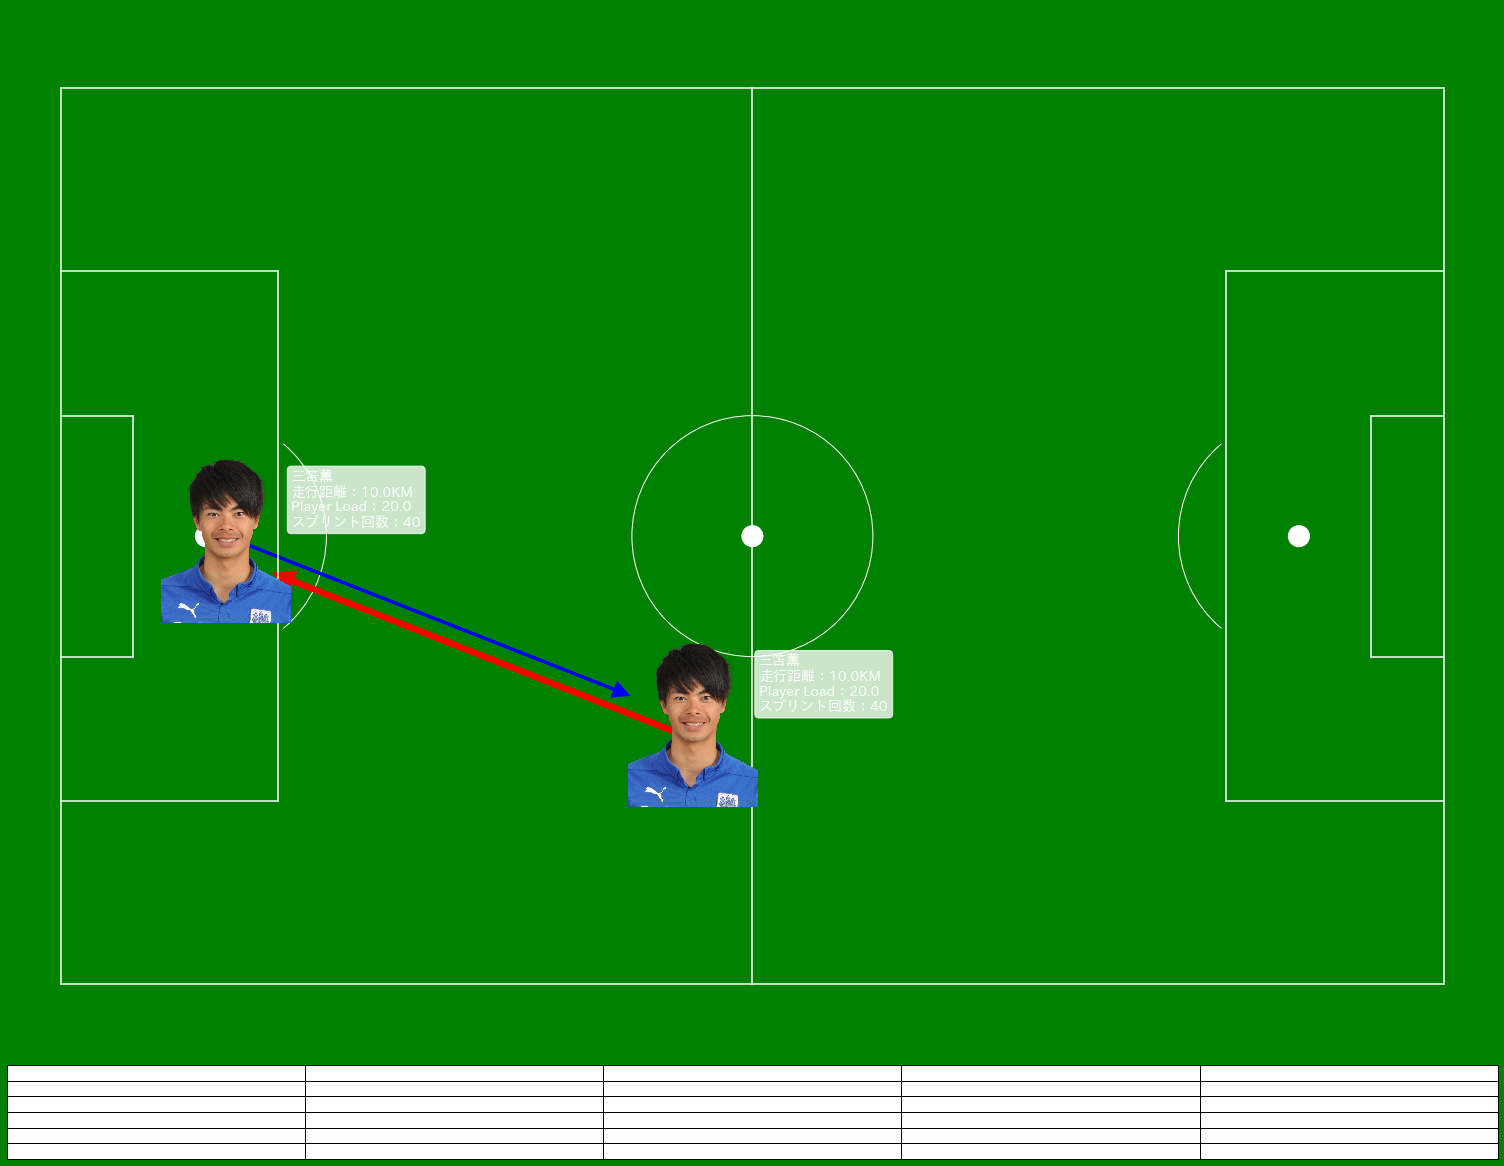

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:

        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

    return artists


fig, ax = match_data.plot_pitch()
# for player, data in match_data.average_positions().items():
#     x = player, data 
#     y = 
x = 12.5
y = 34
x2 = 48
y2 = 20
imscatter(x, y, 'myTheme/static/images/profile_imgs/mitomakaoru-removebg.png',ax, 0.3)

textstr = '\n'.join((
    '%s'% ('三笘薫'),
    '走行距離：%.1fKM' % (10, ),
    'Player Load：%.1f' % (20, ),
    'スプリント回数：%.d' % (40, )))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(x+5, y+5, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

imscatter(x2, y2, 'myTheme/static/images/profile_imgs/mitomakaoru-removebg.png',ax, 0.3)

textstr = '\n'.join((
    '%s'% ('三笘薫'),
    '走行距離：%.1fKM' % (10, ),
    'Player Load：%.1f' % (20, ),
    'スプリント回数：%.d' % (40, )))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(x2+5, y2+5, textstr, fontsize=14,
        verticalalignment='top', bbox=props)


ax.arrow(x, y, (x2-x)/1.2, (y2-y)/1.2, linewidth=3, head_width=1, head_length=1, fc='blue', ec='blue')
ax.arrow(x2-1, y2-1, (x-x2)/1.2, (y-y2)/1.2, linewidth=6, head_width=1, head_length=1, fc='red', ec='red')

data= [
    [ ('高嶺',66), ('三笘',17),  ('加藤',75), ('阿部',57),  ('永満',32)],
    [ ('高嶺',58), ('三笘',38),  ('山川',78),  ('阿部',99), ('永満',16)],
    [ ('高嶺',89),  ('三笘',80), ('山川',15), ('阿部',49), ('永満',60)],
    [ ('高嶺',78),  ('三笘',81), ('山川',15), ('大川',19),  ('永満',69)],
    [('高嶺',13), ('山川',33), ('加藤',34), ('大川',78),  ('永満',52)]
]

cell_text = []
columns = ['走行距離', 'HI距離','最高速度','最高速度','スプリント回数']
for index, row in enumerate(data):
    row.sort(key=lambda tup: tup[1], reverse=True)
    cell_text.append(['{0} {1}'.format(name, num) for (name, num) in row])

cell_text = list(map(list, zip(*cell_text)))
the_table = plt.table(cellText=cell_text, colLabels=columns,
                     loc='bottom')


plt.tight_layout()
# plt.savefig(path+'pitch.png', facecolor='green', bbox_inches='tight')
plt.show()

In [15]:
yam = match_data.yaml

In [16]:
import math
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def ang(v1, v2):
    return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


scale = 105 / np.linalg.norm(f(yam['p1'])-f(yam['p3'])) 
angle = ang(f(yam['p1'])-f(yam['p3']), np.asarray([0, 105]))

trans_mat = np.asarray([
    [1, 0, -f(yam['p1'])[0]],
    [0, 1, -f(yam['p1'])[1]],
    [0,0,1]
])

scale_mat = np.asarray([
    [scale, 0, 0],
    [0, scale, 0],
    [0,0,1]
])

rot_mat = np.asarray([
    [np.cos(angle),-np.sin(angle), 0],
    [np.sin(angle), np.cos(angle), 0],
    [0,0,1]
])

In [17]:
a = trans_mat @ np.append(f(yam['p3']),[1])
b = scale_mat @ a
c = rot_mat @ b
c

array([-90.0978719 ,  53.92006564,   1.        ])

In [18]:
scale * np.linalg.norm(f(yam['p1'])-f(yam['p2'])) 

77.29962658368557

In [19]:
def f(x):
    x = x.split(',')
    return np.asarray(x, dtype=np.float64())

def solve_affine( p1, p2, p3, s1, s2, s3):
    x = np.transpose(np.matrix([p1,p2,p3]))
    y = np.transpose(np.matrix([s1,s2,s3]))
    # add ones on the bottom of x and y
    x = np.vstack((x,[1,1,1]))
    y = np.vstack((y,[1,1,1]))
    # solve for A2
    A2 = y * x.I
    # return function that takes input x and transforms it
    # don't need to return the 4th row as it is 
    return A2

def pitch_co(x, y):
    def solve_affine( p1, p2, p3, s1, s2, s3):
        x = np.transpose(np.matrix([p1,p2,p3]))
        y = np.transpose(np.matrix([s1,s2,s3]))
        # add ones on the bottom of x and y
        x = np.vstack((x,[1,1,1]))
        y = np.vstack((y,[1,1,1]))
        # solve for A2
        A2 = y * x.I
        # return function that takes input x and transforms it
        # don't need to return the 4th row as it is 
        return A2

    M = solve_affine(f(yam['p1']),f(yam['p2']),f(yam['p3']),
                 (0,0,1), (58,0,1), (0,105,1))
    return (M @ np.asarray([x,y,1]))[0,:2]

pitch_co(*f(yam['p1']))

matrix([[ 9.31322575e-10, -1.86264515e-09]])

In [23]:
def average_positions(players):
    d = match_data.get_gps_data()
    dic = {}
    for player, df in d.items():
        if player in players:
            df = df[:45*60*15] 
            dic[player] = (df['Latitude'].sum(), df['Longitude'].sum())
    return dic

players = ['Tsunoda Ryotaro', 
           'Igawa Sora', 
           'Yamakawa Tetsushi', 
           'Abe Kouto', 
           'Kato Takuto', 
           'Iwamoto Sho', 
           'Miura Masato', 
           'Takamine Tomoki',
           'Yamahara Reon', 
           'Watanabe Yoh', 
           'Mori Kaito']

# fig, ax = match_data.plot_pitch()
for name, player in average_positions(players).items():
    x = pitch_co(*player)[0,0]
    y = pitch_co(*player)[0,1]
    print(name, x, y)
    
    plt.scatter(x,y)

print(x,y)
print(name, pitch_co(*player))

12.5 34


NameError: name 'name' is not defined

In [21]:
d = match_data.get_gps_data()['Watanabe Yoh']
d

KeyError: 'Watanabe Yoh'

In [22]:
import os,time
path = match_data.gps_path
start = dt.time.min
end = dt.time.max
d = {}

for f in os.listdir(path):
    if f.endswith('.csv'):

        # 個人のメタデータの取得
        _ = pd.read_csv(open('{0}/{1}'.format(path, f),'rU'), encoding='utf-8', engine='c', nrows=5, header=None, index_col=0).T
        player_name = _['Player'].iloc[0][2:]
        session = _['Session'].iloc[0][2:]
        _start = dt.time(*time.strptime(_['Start'].iloc[0], "%M:%S.%f")[3:6])
        _end = dt.time(*time.strptime(_['End'].iloc[0], '%M:%S.%f')[3:6])

        # start=最小の_start, end=最大の_end
        start = max(start, _start)
        end = max(end, _end)

        # 個人のGPSデータの取得
        _df = pd.read_csv('{0}/{1}'.format(path, f), skiprows=7,
                          usecols=[
                              'Time',
                              'Speed (km/h)',
                              'Latitude',
                              'Longitude',
                              'Acceleration (m/s/s)',
                              'Distance (m)',
                              'Bodyload'
                          ])

        break

NameError: name 'dt' is not defined

In [0]:
_df.columns

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home
